<a href="https://colab.research.google.com/github/junting-huang/data_storytelling/blob/main/case_7_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# case_11. time

## 11.1 story arc

In [4]:
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
import nltk

Punkt tokenizer, which is a part of the Natural Language Toolkit (NLTK) library in Python, is designed for sentence tokenization, which means it splits text into individual sentences. NLTK's Punkt tokenizer is trained on large corpora of text in multiple languages, making it robust and capable of handling various sentence structures and languages effectively. It uses unsupervised learning algorithms to determine sentence boundaries based on punctuation and capitalization patterns.

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/liyao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Function plot_sentiment_arc reads a text file specified by file_path, tokenizes the text into sentences, performs sentiment analysis on each sentence using TextBlob, and plots the sentiment polarity scores of the sentences.

In [9]:
def plot_sentiment_arc(file_path):
    # Open and read the file
    with open(file_path, 'r') as file:
        text = file.read()

    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Run sentiment analysis on each sentence
    sentiment_scores = []
    for sentence in sentences:
        blob = TextBlob(sentence)
        sentiment_scores.append(blob.sentiment.polarity)

    # Plot the sentiment scores
    plt.plot(sentiment_scores)
    plt.title('Narrative Arc based on Sentiment Analysis')
    plt.ylabel('Sentiment Polarity')
    plt.show()


What can you conclude from the following plot? Please refer to the given snow white text. 

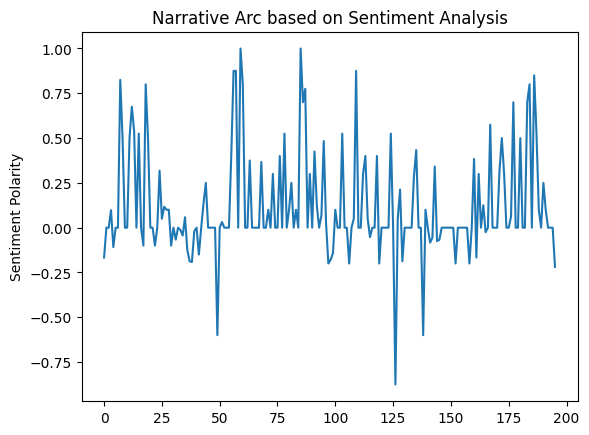

In [32]:
# Use the function on your text file
plot_sentiment_arc('data/snow-white.txt')

## 11.2 time series forecasting

Time series forecasting in literature refers to the application of forecasting techniques to analyze and predict trends, patterns, and future values in literary data. This can encompass various aspects of literary works, including:

* Popularity and Trend Analysis: Time series forecasting can be applied to analyze the popularity of literary genres, authors, or specific books over time. This analysis helps in understanding cultural trends and preferences among readers.

* Text Analysis and Sentiment Forecasting: Techniques such as sentiment analysis applied to literary texts can provide insights into changing attitudes, emotions, and themes over time. This information is valuable for literary scholars, marketers, and publishers.

* Predictive Analytics in Publishing: Time series forecasting is utilized in predictive analytics models for predicting book sales, identifying potential bestsellers, and estimating the success of upcoming literary releases. Publishers and authors use these forecasts to make informed decisions about book launches and marketing strategies.

In the following section, we are going to introduce the basic time series model.

Statsmodels provides functionality for time series analysis, including autoregressive integrated moving average (ARIMA) models, seasonal decomposition, state space models, and vector autoregression (VAR) models.

In [15]:
#!pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/b1/33/44469755648f2e7ab353ef1666c2513a9f75cb4ecf4de63df58c8c572aa1/statsmodels-0.14.1-cp38-cp38-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 12.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 5.7 MB/s eta 0:00:00ta 0:00:01


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

Reload the sentiment score by sentence in the previous section and convert it into a data frame.

In [33]:
# Open and read the file
with open("data/snow-white.txt", 'r') as file:
    text = file.read()

# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Run sentiment analysis on each sentence
sentiment_scores = []
for sentence in sentences:
    blob = TextBlob(sentence)
    sentiment_scores.append(blob.sentiment.polarity)

In [34]:
# Now we want to convert the month column into a datetime object
df = pd.DataFrame()
df['index'] = range(len(sentiment_scores))
df['score'] = sentiment_scores

# Use Month column as index column
df.index = df['index']
del df['index']
print(df.head())

          score
index          
0     -0.166667
1      0.000000
2      0.000000
3      0.097619
4     -0.108333


First, let’s view the time series plot.

Text(0, 0.5, 'Sentiment Polarity')

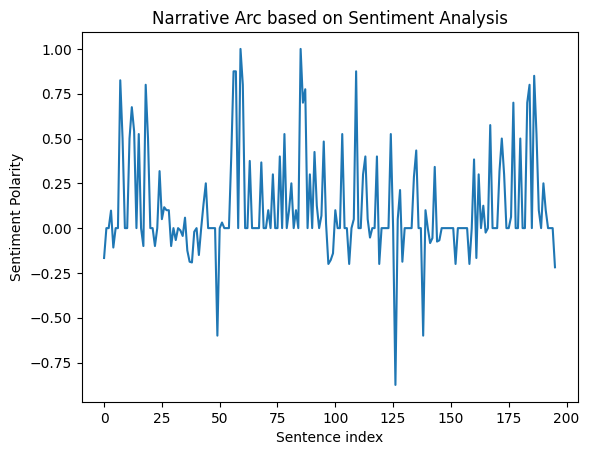

In [35]:
plt.plot(df)
plt.title('Narrative Arc based on Sentiment Analysis')
plt.xlabel('Sentence index')
plt.ylabel('Sentiment Polarity')


### stationary

Stationarity of a time series means that the manner in which time series data changes is constant, without any trends or seasonal patterns. It is an important assumtion to check before we fit data to a time series model. To check stationary, we can visual the data by plotting its rolling mean and standard deviation (std), or utilize statistical test like the Dickey Fuller test.

Next, let’s overlay our time series with the rolling mean and seven-month rolling standard deviation:

In [36]:
def test_stationarity(df):
    
    # Plot rolling mean and std
    rolling_mean = df.rolling(5).mean()
    rolling_std = df.rolling(5).std()
    
    plt.plot(df, color="blue",label="Original Data")
    plt.plot(rolling_mean, color="red", label="Rolling Mean")
    plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation")
    plt.xlabel('index')
    plt.ylabel('sentiment score')
    plt.title("Time Series, Rolling Mean, Standard Deviation")
    plt.legend(loc="best")
    
    # use the augmented Dickey-Fuller test from the statsmodels package. 
    adft = adfuller(df,autolag='AIC')

    output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  ,
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
    return print(output_df)

         Values                       Metric
0 -6.150111e+00              Test Statistics
1  7.598430e-08                      p-value
2  2.000000e+00             No. of lags used
3  1.930000e+02  Number of observations used
4 -3.464694e+00          critical value (1%)
5 -2.876635e+00          critical value (5%)
6 -2.574816e+00         critical value (10%)


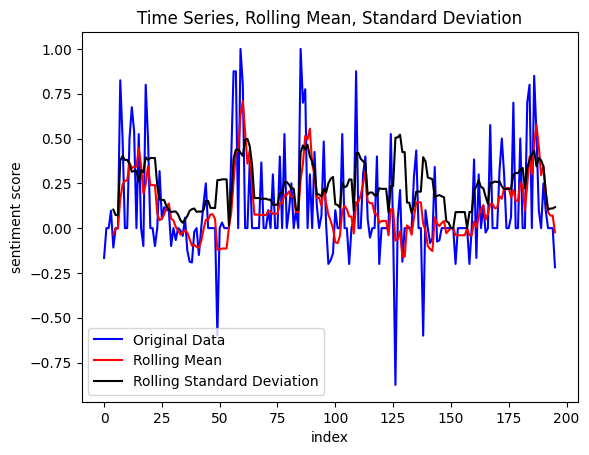

In [37]:
test_stationarity(df)

For time series to be stationary, we need to ensure that both Rolling Mean and Rolling Standard Deviation remain fairly constant with respect to time.


For the augmented Dickey-Fuller test, For a time series to be stationary the p-value should be low (according to the null hypothesis); We also want the critical values at 1%,5%,10% confidence intervals to be as close as possible to the test statistics. 

From the plot and testing, we may conclude that our time series model is stationary. For non-stationary data, we want to transform it into a stationary time series before we model it. The simplest way is to take log to lower the rate at which rolling mean increases and looking at the difference between value at each time point and value at the previous time point. This latter step is called a time-shift transformation or differencing. 

### Autocorrelation: ACF & PACF
### Autocorrelation function (ACF)
Auto-correlation is a measure of how correlated time series data is at a given point in time with past values. For example, if our data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well. 

Use the ACF and PACF plots provied below to help pick the number of terms to use in our AR,MA, and ARMA models below.

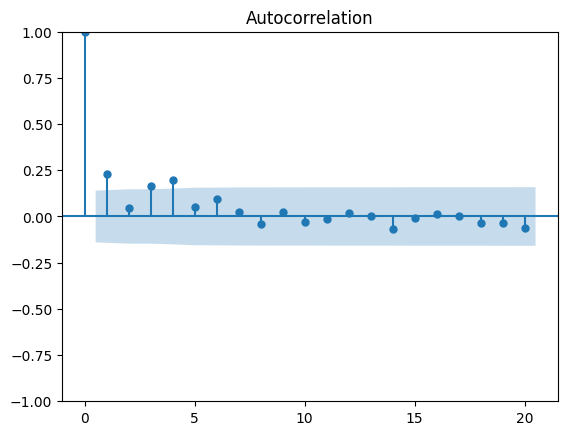

In [39]:
plot_acf(df, lags=20)

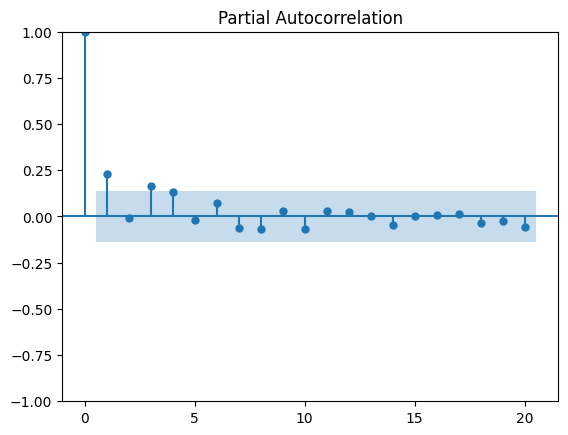

In [40]:
plot_pacf(df, lags=20)

### AutoRegressive Model (AR)
Autoregressive models operate under the premise that past values have an effect on current values. As long as the assumption holds, we can build a linear regression model that attempts to predict value of a dependent variable today, given the values it had on previous days:
$$
X_t = \beta_0 +\sum^p_{i=1}\beta_iX_{t-i}+\epsilon_t
$$

We can create an AR model with the ARIMA function. ARIMA takes order parameters (p,d,q) with p and q being the number of terms to use for AR and MA respectively. d is orders of differencing to apply. Since we applied our own differencing before, all our models in this exercise notebook should keep d at 0.

Plotting AR model


Text(0, 0.5, 'Sentiment score')

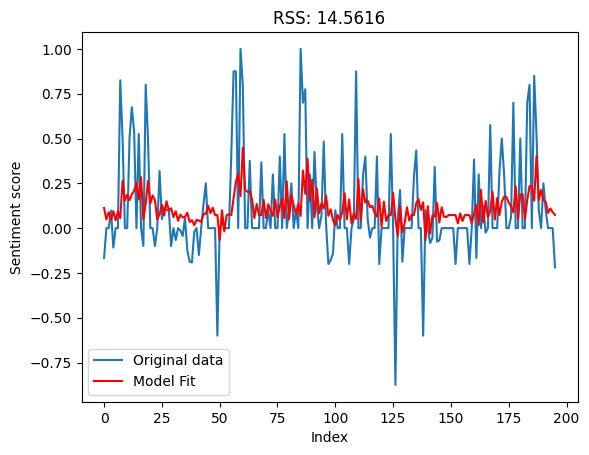

In [43]:
# Create an AutoRegressive model by setting only AR terms in the ARIMA model.
AR_model = ARIMA(df, order=(3,0,0))
results_AR = AR_model.fit()
plt.plot(df)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - df['score'])**2))
plt.legend(['Original data','Model Fit'])
print('Plotting AR model')
plt.xlabel('Index')
plt.ylabel('Sentiment score')

### Moving Average Model (MA)
An MA model assumes that the current value is series mean plus linear combination of errors from previous values:
$$
X_{t}=\mu+\varepsilon_{t}+\sum_{i=1}^{q} \theta_{i} \varepsilon_{t-i}
$$

Fit an MA model for our time series data:

Plotting MA model


Text(0, 0.5, 'Sentiment score')

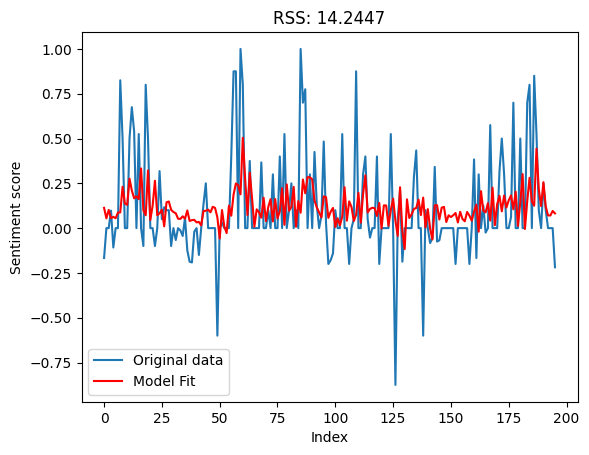

In [45]:
#Create a Moving Average model by setting only MA terms in the ARIMA model.
MA_model = ARIMA(df, order=(0,0,4))
results_MA = MA_model.fit()
plt.plot(df)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - df['score'])**2))
plt.legend(['Original data','Model Fit'])
print('Plotting MA model')
plt.xlabel('Index')
plt.ylabel('Sentiment score')

### Autoregressive–moving-average (ARMA) model and Autoregressive–integrated-moving-average (ARIMA) model 
The notation ARMA $(p, q)$ refers to the model with $p$ autoregressive terms and $q$ moving-average terms. This model contains the AR $(p)$ and MA( $q)$ models,
$$
X_t = \beta_0 +\sum^p_{i=1}\beta_iX_{t-i} +\sum^q_{i=1}\theta_i\epsilon_{t-i}+\epsilon_t
$$

Plotting ARIMA model


Text(0, 0.5, 'Sentiment score')

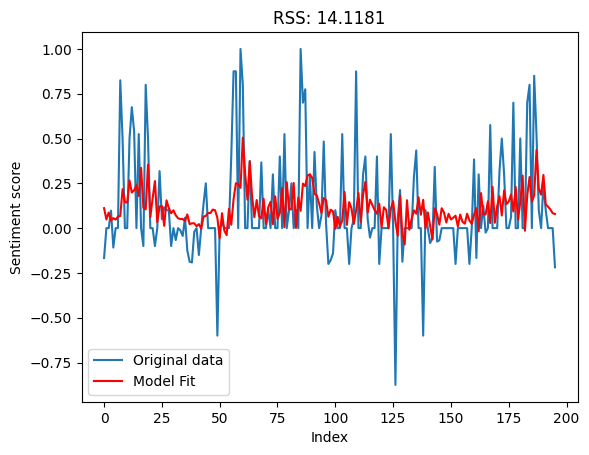

In [46]:
#Create a Moving Average model by including both AR and MA terms in the ARIMA model.
ARMA_model = ARIMA(df, order=(3,0,4))
results_ARMA = ARMA_model.fit()
plt.plot(df)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARMA.fittedvalues - df['score'])**2))
plt.legend(['Original data','Model Fit'])
print('Plotting ARIMA model')
plt.xlabel('Index')
plt.ylabel('Sentiment score')

### Model Selection
In the previous section, we picked the $p$ and $q$ for our models by "eye-balling" the ACF and PACF plots. Now we will check AIC, BIC, and AICc metrics. We want to pick model that has the smallest AIC, AICc, BIC values.


AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and AICc (corrected Akaike Information Criterion) are widely used model selection criteria in time series analysis. These metrics are used to compare the relative goodness-of-fit of different models, taking into account the trade-off between model complexity and goodness of fit. Lower values of these metrics indicate better model performance.

In [47]:
def AIC_BIC_check(model):
    
    p = model.model_orders['ar']
    q = model.model_orders['ma']
    
    return print(f"******\n"
    f"AIC p={p} q={q}: {model.aic}\n"
    f"AICc p={p} q={q}: {model.aicc}\n"
    f"BIC p={p} q={q}: {model.bic}\n")
    

In [48]:
AIC_BIC_check(results_AR)
AIC_BIC_check(results_MA)
AIC_BIC_check(results_ARMA)

******
AIC p=3 q=0: 56.72854972234336
AICc p=3 q=0: 57.04433919602757
BIC p=3 q=0: 73.11912301849594

******
AIC p=0 q=4: 54.497034368405586
AICc p=0 q=4: 54.94147881285003
BIC p=0 q=4: 74.16572232378869

******
AIC p=3 q=4: 58.76971958320832
AICc p=3 q=4: 59.73746151869219
BIC p=3 q=4: 88.27275151628297



According to the above metrics, ARIMA(p=3,q=4) is a best time series model given the data.

### Forecast

Now we are ready to create an ARIMA model to try to forecast future values in the time series.

In [49]:
# the test set is taken from the latest 20% of time steps so we don't shuffle.
train, test = train_test_split(df, test_size=0.2,shuffle=False)

Plotting ARIMA model, p=3, q=4


Text(0, 0.5, 'Sentiment Score')

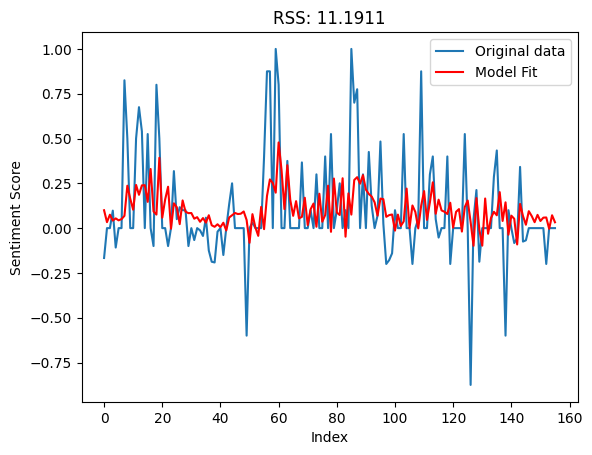

In [55]:
# Create an ARMA model using a good combination of p and q terms. 
# Feel free to experiment with the model selection steps before if needed.
model = ARIMA(train, order=(3,0,4))
results_ARIMA = model.fit()
# forecasting should inculed at least as many steps as the testing set.
forecast=results_ARIMA.forecast(steps=(test.shape[0]))

plt.plot(train)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - train['score'])**2))
plt.legend(['Original data','Model Fit'])
print('Plotting ARIMA model, p=3, q=4')
plt.xlabel('Index')
plt.ylabel('Sentiment Score')

Text(0, 0.5, 'Sentiment score')

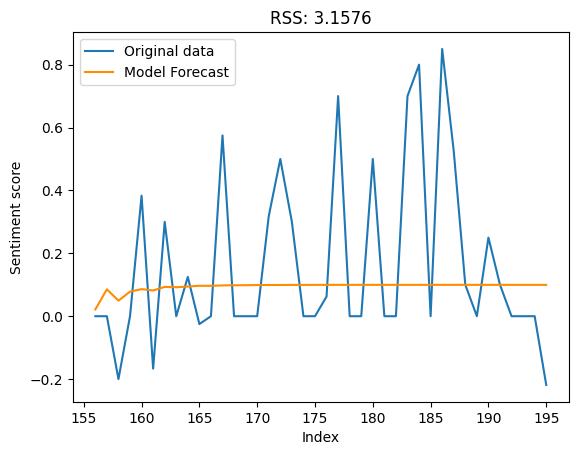

In [56]:
plt.plot(test)
plt.plot(forecast, color='darkorange')
plt.title('RSS: %.4f'%np.sum((np.transpose((test.to_numpy()))[0] - forecast.to_numpy())**2))
plt.legend(['Original data','Model Forecast'])
plt.xlabel('Index')
plt.ylabel('Sentiment score')